# Phase 2 - Milestones 1

Nama : Raditya Saputra

Batch : 007 FTDS

# Perkenalan

This dataset comes from: https://www.kaggle.com/blastchar/telco-customer-churn

The data set includes information about customers who use network services.
- Services that each subscriber has registered with: telephone, multiple channels, internet, online security, online backup, device protection, technical support and TV and movie streaming
- Customer account information: how long they have been a customer, contract, payment method, paperless billing, monthly billing, and total billing
- Demographic info about customers: gender, age range, and if they have a partner and dependents
- Customers who left in the past month are called Churn
- Whether the customer churn or not (Yes or No)

The objective to be achieved is predicting behavior to retain customers.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Data Loading

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Gambaran sekilas dataset

In [3]:
df.shape

(7043, 21)

The dataset consists of 7043 rows and 21 columns

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset consists of 2 types of numeric data and categories

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset has no missing values

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

many customers who come from a young age

- The longest tenure is 72 months / 6 years
- the average monthly fee is 64,761 and the maximum monthly fee is 118,750

In [9]:
df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


- Gender is dominated by Male
- Many customers don't have partners and also dependents
- Many customers subscribe to the phone
- More customers who don't use multiple channels
- Internet service is dominated by fiber optic
- A lot of customers don't use online security, online backup, device protection, technical support, and TV and movie streaming
- More customer contract terms per month
- More customers make payments via electronic check and paperless

Seen in the total charge feature there is information that is empty, which is not detected, it will be repaired

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Terdapat 11 missing values sebenarnya, pada total pembayaran, tidak ada alasan kenapa missing values ini terjadi dan missing values tidak banyak, maka akan dihapus dan begitu juga dengan kolum customerID

In [11]:
df.drop(['customerID'], axis=1, inplace=True)
df.dropna(inplace=True)

In [12]:
def kategori(df):
    for column in df:
        if df[column].dtypes == 'O':
            print(f'{column} : {df[column].unique()}')
kategori(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Here's a label for each feature. There is a commonality of intent and purpose on the label. Next will be replaced
- No internet service = No
- No. phone service = No

In [13]:
df = df.replace(['No phone service', 'No internet service'], 
                    ['No', 'No'])

In [14]:
data = df.copy()

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='gender', ylabel='count'>

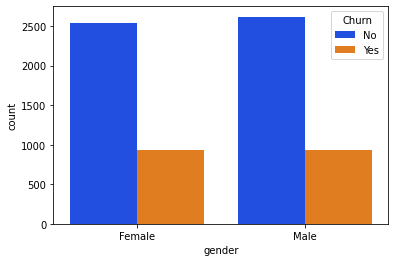

In [15]:
sns.countplot(x= data['gender'], hue= data['Churn'],palette='bright')

- There are a lot of customers between boys and girls who survive

<AxesSubplot:xlabel='Partner', ylabel='count'>

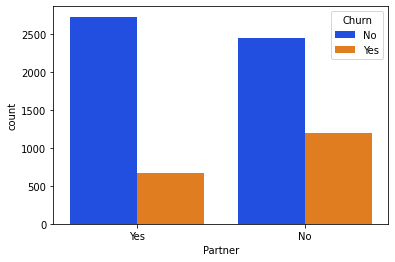

In [16]:
sns.countplot(x= data['Partner'], hue= data['Churn'],palette='bright')

- Customers who have more partners don't churn

<AxesSubplot:xlabel='Dependents', ylabel='count'>

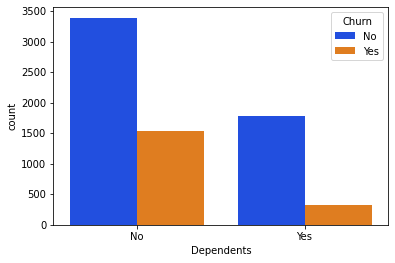

In [17]:
sns.countplot(x= data['Dependents'], hue= data['Churn'],palette='bright')

- Customers who do not have more dependents do not churn

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

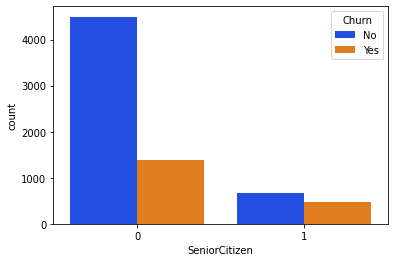

In [18]:
sns.countplot(x= data['SeniorCitizen'], hue= data['Churn'],palette='bright')

- Most of the customers who don't churn come from young people

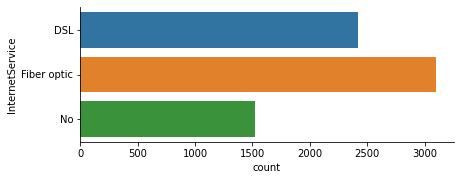

In [19]:
ax = sns.catplot(y='InternetService', kind='count', data=data, height=2.6, aspect=2.5, orient='h')

- Customers use internet services from fiber optic a lot

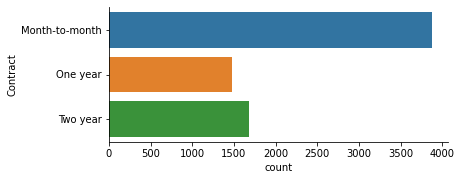

In [20]:
ax = sns.catplot(y='Contract', kind='count', data=data, height=2.6, aspect=2.5, orient='h')

- Many customers subscribe with a monthly payment

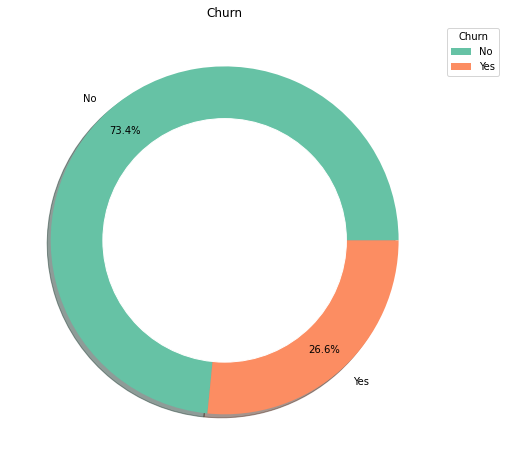

In [21]:
PALETTE = sns.color_palette("Set2")
sizes = dict(data['Churn'].value_counts())

plt.figure(figsize=(12, 8))
plt.title('Churn')
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title='Churn', labels=sizes.keys(), bbox_to_anchor=(1, 1))


my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

- Many customers don't churn or still survive

In [22]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

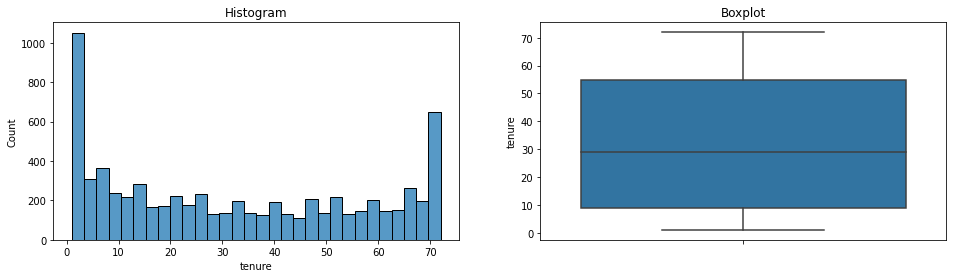


Skewness Value :  0.23773083190513133


In [23]:
diagnostic_plots(data, 'tenure')
print('\nSkewness Value : ', data['tenure'].skew())

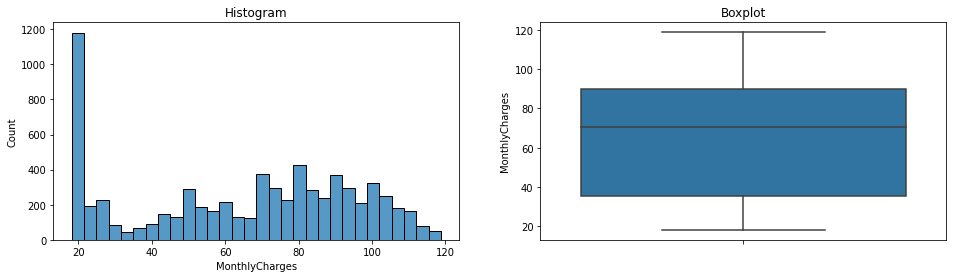


Skewness Value :  -0.22210292770166232


In [24]:
diagnostic_plots(data, 'MonthlyCharges')
print('\nSkewness Value : ', data['MonthlyCharges'].skew())

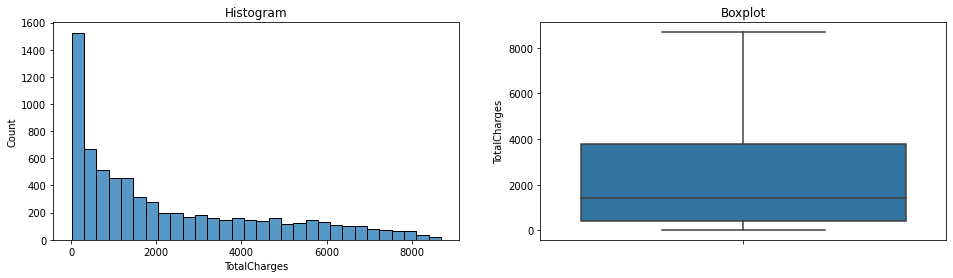


Skewness Value :  0.9616424997242504


In [25]:
diagnostic_plots(data, 'TotalCharges')
print('\nSkewness Value : ', data['TotalCharges'].skew())

There are no outliers

# Data Preprocessing

In [26]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

X is all the features in the dataset except the target/churn fitur feature

### Splitting

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10)

Splitting is done by dividing the data for train 80, test 20 and after that the train is split again for validation data

### Splitting Kolum Numerik dan Kategori

In [28]:
num_cols = data._get_numeric_data().columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Churn')

print('Numeric Columns     : ', num_cols)
print('Categorical Columns : ', cat_cols)

Numeric Columns     :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Scaling

In [29]:
X_train_num = X_train[num_cols].reset_index().drop(['index'], axis = 1)
X_train_cat = X_train[cat_cols].reset_index().drop(['index'], axis = 1)

In [30]:
X_test_num = X_test[num_cols].reset_index().drop(['index'], axis = 1)
X_test_cat = X_test[cat_cols].reset_index().drop(['index'], axis = 1)

In [31]:
X_val_num = X_val[num_cols].reset_index().drop(['index'], axis = 1)
X_val_cat = X_val[cat_cols].reset_index().drop(['index'], axis = 1)

In [32]:
scaler = MinMaxScaler()
sc = scaler.fit(X_train_num)
X_train_num_scaled = sc.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_val_num_scaled = scaler.transform(X_val_num)

### Encoding

In [33]:
ore = OrdinalEncoder()
ore_t = ore.fit(X_train_cat)
X_train_cat_ore = ore_t.transform(X_train_cat)
X_test_cat_ore = ore.transform(X_test_cat)
X_val_cat_ore = ore.transform(X_val_cat)

In [34]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_ore], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_ore], axis=1)
X_val_final = np.concatenate([X_val_num_scaled, X_val_cat_ore], axis=1)

In [35]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

# Model Definition

In [36]:
X_train_final.shape

(5062, 19)

Viewing input layers

In [37]:
input_fitur = Input(shape=(19,))
hidden_1 = Dense(5, activation='relu')(input_fitur)
output_layer = Dense(1, activation='sigmoid')(hidden_1)

model = Model(inputs=input_fitur, outputs=output_layer)

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

for the second model, we will try to add a hidden layer as a hyperparameter

In [39]:
model1 = Sequential()
model1.add(Dense(5, activation='relu', input_shape=(19,)))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(15, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [40]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model Training

In [41]:
model_training = model.fit(X_train_final, y_train, epochs=30, validation_data=(X_test_final, y_test))

Epoch 1/30
159/159 [==============================] - 1s 3ms/step - loss: 0.9490 - accuracy: 0.4143 - val_loss: 0.7198 - val_accuracy: 0.5458
Epoch 2/30
159/159 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.6472 - val_loss: 0.6319 - val_accuracy: 0.6908
Epoch 3/30
159/159 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7130 - val_loss: 0.5984 - val_accuracy: 0.7193
Epoch 4/30
159/159 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.7258 - val_loss: 0.5729 - val_accuracy: 0.7186
Epoch 5/30
159/159 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7298 - val_loss: 0.5511 - val_accuracy: 0.7242
Epoch 6/30
159/159 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7313 - val_loss: 0.5314 - val_accuracy: 0.7278
Epoch 7/30
159/159 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7327 - val_loss: 0.5140 - val_accuracy: 0.7299
Epoch 

In [42]:
model_training1 = model1.fit(X_train_final, y_train, epochs=100, validation_data=(X_test_final, y_test))

Epoch 1/100
159/159 [==============================] - 1s 3ms/step - loss: 0.5607 - accuracy: 0.7345 - val_loss: 0.5259 - val_accuracy: 0.7342
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7353 - val_loss: 0.4591 - val_accuracy: 0.7356
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7568 - val_loss: 0.4475 - val_accuracy: 0.7647
Epoch 4/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7691 - val_loss: 0.4443 - val_accuracy: 0.7719
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7789 - val_loss: 0.4399 - val_accuracy: 0.7719
Epoch 6/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.7776 - val_loss: 0.4362 - val_accuracy: 0.7768
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.7864 - val_loss: 0.4367 - val_accuracy: 0.7804

In [43]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 5)                 100       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [44]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 100       
                                                                 
 dense_3 (Dense)             (None, 10)                60        
                                                                 
 dense_4 (Dense)             (None, 15)                165       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


# Model Evaluation

In [45]:
metrics = pd.DataFrame(model_training.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.949042,0.414263,0.719840,0.545842
1,0.660799,0.647175,0.631914,0.690832
2,0.610858,0.712959,0.598369,0.719261
3,0.583345,0.725800,0.572932,0.718550
4,0.560958,0.729751,0.551147,0.724236
5,0.541474,0.731331,0.531424,0.727790
6,0.523876,0.732714,0.513955,0.729922
7,0.508382,0.736863,0.498849,0.734897
8,0.495214,0.740616,0.486076,0.732054
9,0.484743,0.745555,0.476625,0.736318


In [46]:
metrics1 = pd.DataFrame(model_training1.history)
metrics1

,loss,accuracy,val_loss,val_accuracy
0,0.560715,0.734492,0.525889,0.734186
1,0.490635,0.735282,0.459106,0.735608
2,0.457414,0.756815,0.447522,0.764748
3,0.449678,0.769064,0.444314,0.771855
4,0.443125,0.778941,0.439902,0.771855
...,...,...,...,...
95,0.404340,0.808969,0.428512,0.798152
96,0.404393,0.809561,0.425246,0.796731
97,0.403825,0.811932,0.425509,0.796731
98,0.402760,0.811142,0.428193,0.798152


<AxesSubplot:>

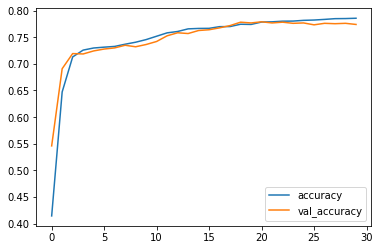

In [47]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

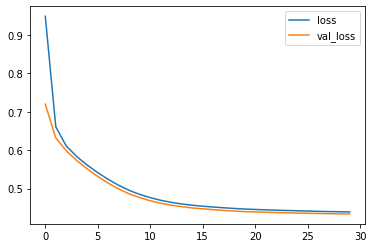

In [48]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

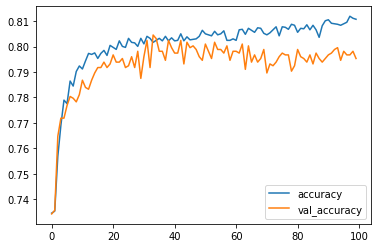

In [49]:
metrics1[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

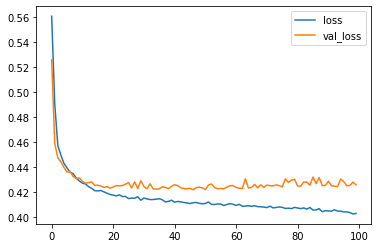

In [50]:
metrics1[['loss', 'val_loss']].plot()

The model cannot learn any deeper, it can be seen in the loss and accuracy which are stuck and approaching overfitting, in the Epoch 100/100 loss: 0.4046 - accuracy: 0.8068 - val_loss: 0.4187 - val_accuracy: 0.7960 not much different from the Epoch 30/30 loss: 0.4218 - accuracy: 0.8003 - val_loss: 0.4211 - val_accuracy: 0.7939.

# Model Inference

In [51]:
y_pred = model.predict(X_val_final)

In [52]:
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
y_pred.squeeze()

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0.

In [53]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       408
           1       0.74      0.48      0.58       155

    accuracy                           0.81       563
   macro avg       0.78      0.71      0.73       563
weighted avg       0.80      0.81      0.80       563



# Pengambilan Kesimpulan

This dataset consists of information about network service subscribers, including:
- Services that have been registered by each customer
- Customer account information
- Demographic info about customers

The dataset consists of 7043 rows and 21 columns

Many customers come from a young age who are male, do not have a partner, dependents and choose to subscribe to telephone, internet.
These young people take a monthly package and pay for it via electronic check/wallet app with an average payment of 64,761.
not many use multipile channels, online security, device protection, technical support, and streaming TV and movies.

Retaining customers can be done by giving rewards to customers who have been loyal/royal in using telco services, increasing internet speed in the customer area, Providing educational information for customers who have not used device protection, what kind of device protection is, Providing channel promos free on streaming TV/movies.
final,
If the customer has not subscribed again in the last month, provide interesting advertisements so that customers can re-subscribe again.

Conducted 2 training models with different hyperparameters
- model 1 is given 5 hidden layers and 30 epochs
- model 2 is given 3 hidden layers including 5, 10, 15 and epoch 100

when hidden layers and epochs continue to be added, the modeling does not show its best performance, and instead leads to overfitting, the model is not able to learn any further. For the best modeling accuracy results are 0.79 with 1 hidden layer totaling 5 and epochs as many as 30,

### Pipeline using pandas & tensorflow

In [54]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train))

In [55]:
numeric_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(19,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

bisa di shuffle, repeat, batch size, compile, fit model

acc gak beda jauh